# Data Visualization for Business

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
pd.options.mode.chained_assignment = None  # hide SettingWithCopyWarning

[nltk_data] Downloading package stopwords to C:\Users\Sanket
[nltk_data]     Pandilwar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Reading Business Data

In [2]:
df_yelp_business=pd.read_json('yelp_academic_dataset_business.json',encoding="utf8",lines=True)
df_yelp_business=df_yelp_business[['business_id','city','state','stars','review_count','categories']]
df_yelp_business[:1]

,business_id,city,state,stars,review_count,categories
0,f9NumwFMBDn751xgFiRbNA,Cornelius,NC,3.5,36,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."


## Count of businesses per state

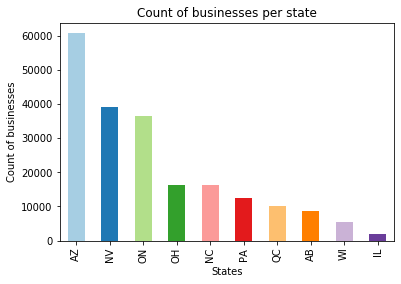

In [74]:
df_yelp_business.state.groupby(df_yelp_business.state).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Count of businesses per state")
plt.xlabel("States")
plt.ylabel("Count of businesses")
plt.show()

## Count of restaurant businesses per state

In [4]:
df_only_restaurant=df_yelp_business[df_yelp_business['categories'].str.contains('Restaurants',na=False)]
df_only_restaurant.to_pickle("df_only_restaurant.pkl")
df_yelp_business.shape
df_only_restaurant.shape

(63944, 6)

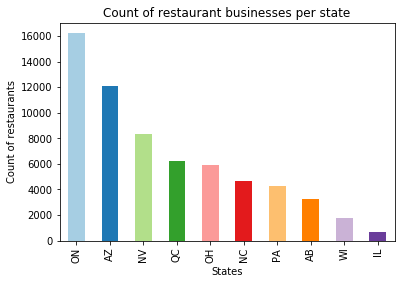

In [72]:
df_only_restaurant.state.groupby(df_only_restaurant.state).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Count of restaurant businesses per state")
plt.xlabel("States")
plt.ylabel("Count of restaurants")
plt.show()

## Count of restaurant businesses per city

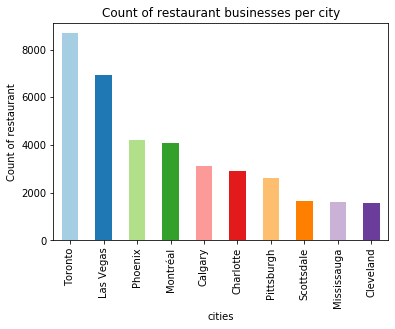

In [69]:
df_only_restaurant.city.groupby(df_only_restaurant.city).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Count of restaurant businesses per city")
plt.xlabel("Cities")
plt.ylabel("Count of restaurant")
plt.show()

## Top 20 Categories in Business

In [119]:
df_yelp_business = df_yelp_business.dropna(subset=['categories'])
df_yelp_business.shape

(208869, 6)

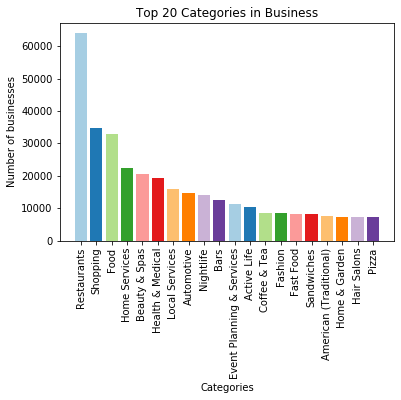

In [82]:
categories={}
for cat_list in df_yelp_business.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center",
        color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Top 20 Categories in Business")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

## Popular categories of businesses in Toronto City

In [84]:
toronto=df_yelp_business[df_yelp_business['city']=='Toronto']
toronto.shape

(20366, 6)

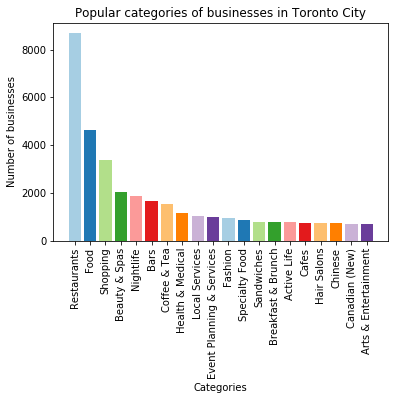

In [88]:
categories={}
for cat_list in toronto.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center", color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Toronto City")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

## Popular categories of businesses in Las Vegas City

In [91]:
las_vegas=df_yelp_business[df_yelp_business['city']=='Las Vegas']
las_vegas.shape

(31631, 6)

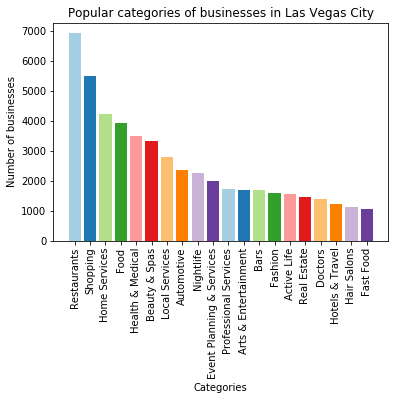

In [92]:
categories={}
for cat_list in las_vegas.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center",color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Las Vegas City")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

## Popular categories of businesses in Arizona

In [93]:
arizona=df_yelp_business[df_yelp_business['state']=='AZ']
arizona.shape

(60803, 6)

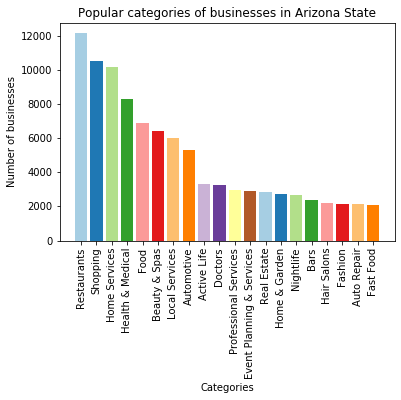

In [98]:
categories={}
for cat_list in arizona.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center", color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Arizona State")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

In [100]:
del arizona
del toronto
del las_vegas

## Distribution of ratings for the restaurants

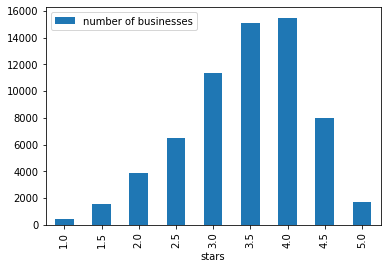

In [101]:
rating_dist=df_only_restaurant[['stars','number of businesses']].groupby(by='stars').count().reset_index()
rating_dist.plot(kind='bar',x='stars',y='number of businesses')
plt.show()

# Data Visualization for User

In [102]:
df_yelp_user_iter = pd.read_json('yelp_academic_dataset_user.json',encoding="utf8", chunksize=100000, lines=True)

df_yelp_user = pd.DataFrame()
i=0
for df in df_yelp_user_iter:
    df = df[['user_id','name','review_count','yelping_since','friends','average_stars']]
    df_yelp_user = pd.concat([df_yelp_user, df])
    i=i+1

df_yelp_user.to_pickle("df_yelp_users.pkl")

In [103]:
df_yelp_user['yelping_since'] = pd.to_datetime(df_yelp_user['yelping_since'])
df_yelp_user.dtypes

user_id                  object
name                     object
review_count              int64
yelping_since    datetime64[ns]
friends                  object
average_stars           float64
dtype: object

## Total number of users

In [104]:
len(df_yelp_user.index)

1968703

## Number of users over time

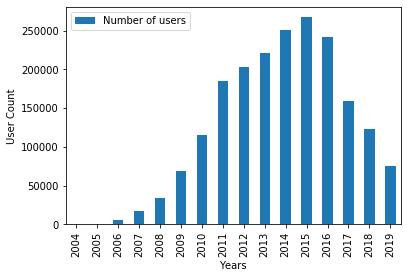

In [105]:
df_yelp_user['year']=df_yelp_user['yelping_since'].dt.year

no_of_users=df_yelp_user[['year','user_id']].groupby('year').count().reset_index()
no_of_users.plot(kind='bar',x='year',y='user_id',label='Number of users')

plt.xlabel('Years')
plt.ylabel('User Count')
plt.legend()
plt.show()

## Rating distribution based on users

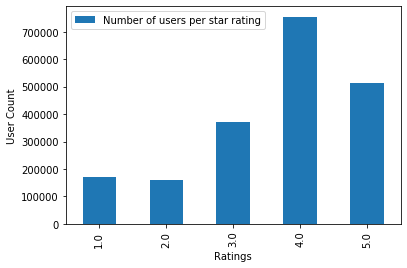

In [106]:
df_yelp_user['avg_stars']=df_yelp_user.average_stars.round()
avg_rating=df_yelp_user[['avg_stars','user_id']].groupby('avg_stars').count().reset_index()
avg_rating.plot(kind='bar',x='avg_stars',y='user_id',label="Number of users per star rating")
plt.xlabel('Ratings')
plt.ylabel('User Count')
plt.legend()
plt.show()

# Data Visualization for Review

In [ ]:
df_yelp_review_iter = pd.read_json('yelp_academic_dataset_review.json',encoding="utf8", chunksize=100000, lines=True)

df_yelp_review = pd.DataFrame()
# i=0
for df in df_yelp_review_iter:
    df = df[df['business_id'].isin(df_yelp_business['business_id'])]
    df_yelp_review = pd.concat([df_yelp_review, df])
#     i=i+1
#     print(i)

In [ ]:
df_yelp_review.to_pickle("df_yelp_reviews.pkl")

## Number of reviews over time

In [3]:
df_yelp_reviews = pd.read_pickle("df_yelp_reviews.pkl")
df_yelp_reviews.shape

(5055992, 6)

In [5]:
df_review_dates=df_yelp_reviews[['review_id','date']]
df_review_dates.shape

(5055992, 2)

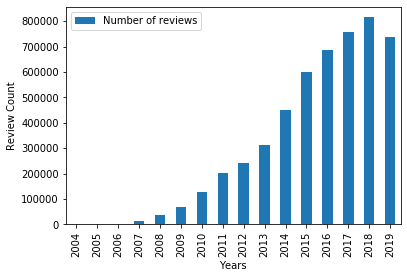

In [23]:
df_review_dates['year']=df_review_dates['date'].dt.year
no_of_reviews=df_review_dates[['year','review_id']].groupby('year').count().reset_index()
no_of_reviews.plot(kind='bar',x='year',y='review_id',label="Number of reviews")
plt.xlabel('Years')
plt.ylabel('Review Count')
plt.legend()
plt.show()

## Number of Reviews year wise

In [14]:
no_of_reviews

,year,review_id
0,2004,7
1,2005,588
2,2006,3518
3,2007,13844
4,2008,37564
5,2009,69778
6,2010,128862
7,2011,202865
8,2012,240251
9,2013,313249


In [26]:
df_yelp_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text'], dtype='object')

## Rating distribution based on reviews

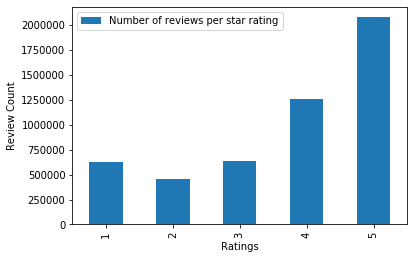

In [56]:
import numpy as np
avg_rating=df_yelp_reviews[['stars','review_id']].groupby('stars').count().reset_index()
avg_rating.plot(kind='bar',x='stars',y='review_id',label="Number of reviews per star rating")
plt.xlabel('Ratings')
plt.ylabel('Review Count')
plt.legend()
plt.show()

## Wordcloud for Most common words used in business

In [114]:
df_yelp_business_with_name=pd.read_json("yelp_academic_dataset_business.json",encoding="utf8",lines=True)
df_yelp_business_with_name.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

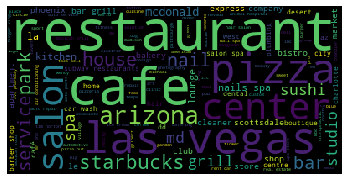

In [144]:
mpl.rcParams['font.size']=10
mpl.rcParams['figure.subplot.bottom']=.1 
word_string=" ".join(df_yelp_business_with_name['name']).replace('"','').lower()
wordcloud = WordCloud(
                          background_color='black',
                          stopwords = set(stopwords.words("english")),
                          max_words=2500,
                          max_font_size=400, 
                          random_state=42
                         ).generate(word_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()